In [7]:
from keras.datasets import imdb
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Input,Dense, Activation,Dropout,Conv2D,MaxPooling2D,Flatten,UpSampling2D
from keras.optimizers import SGD,Adam
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping 
import os,shutil
from keras.preprocessing.image import ImageDataGenerator


original_dir = "C:/Users/kenta takizawa/Pictures/train/train"
base_dir = "C:/Users/kenta takizawa/Pictures/train/cats_and_dogs"

try:
    os.mkdir(base_dir)
    
    train_dir = os.path.join(base_dir,"train")
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir,"validation")
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir,"test")
    os.mkdir(test_dir)

    #training data
    train_cats_dir = os.path.join(train_dir,"cats")
    os.mkdir(train_cats_dir)
    train_dogs_dir = os.path.join(train_dir,"dogs")
    os.mkdir(train_dogs_dir)

    val_cats_dir = os.path.join(validation_dir,"cats")
    os.mkdir(val_cats_dir)
    val_dogs_dir = os.path.join(validation_dir,"dogs")
    os.mkdir(val_dogs_dir)

    test_cats_dir = os.path.join(test_dir,"cats")
    os.mkdir(test_cats_dir)
    test_dogs_dir = os.path.join(test_dir,"dogs")
    os.mkdir(test_dogs_dir)

   
    




SyntaxError: unexpected EOF while parsing (<ipython-input-7-65fe8c62d7a1>, line 47)

In [10]:
from keras.models import Sequential,Model
from keras.layers import Input,Dense, Activation,Dropout,Conv2D,MaxPooling2D,Flatten,UpSampling2D


In [8]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(val_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(val_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)



TypeError: 'float' object is not iterable

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode = "binary")    
    

inputs = Input(shape=(150,150,3))
x = Conv2D(32,(3,3),activation="relu")(inputs)
x = MaxPooling2D((2,2))(x)    
x = Conv2D(64,(3,3),activation="relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3),activation="relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3),activation="relu")(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512,activation="relu")(x)
outputs = Dense(1,activation = "sigmoid")(x) 

model = Model(inputs=inputs,outputs=outputs)
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)
model.save("cats_and_dogs_small_2.h5")

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)

plt.figure(1)
plt.plot(epochs,acc,"bo",label="training acc")
plt.plot(epochs,val_acc,"b",label="val acc")
plt.title("training and val acc")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs,loss,"bo",label="training loss")
plt.plot(epochs,val_loss,"b",label="val loss")
plt.title("training and val loss")
plt.legend()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 330s 3s/step - loss: 0.7148 - acc: 0.5328 - val_loss: 0.7089 - val_acc: 0.4981
Epoch 2/100
100/100 [==============================] - 319s 3s/step - loss: 0.6876 - acc: 0.5581 - val_loss: 0.9029 - val_acc: 0.5522
Epoch 3/100
 96/100 [===========================>..] - ETA: 5:56 - loss: 0.6579 - acc: 0.5944

In [16]:
from keras.applications import VGG16


conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [19]:
base_dir = "C:/Users/kenta takizawa/Pictures/train/cats_and_dogs"

train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")
test_dir = os.path.join(base_dir,"test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extra_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode = "binary")
    i=0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >=sample_count:
            break
    return features,labels

train_features,train_labels = extra_features(train_dir,2000)
validation_features,validation_labels = extra_features(validation_dir,1000)
test_features,test_labels = extra_features(test_dir,1000)
        


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 14s 7ms/step - loss: 0.9263 - acc: 0.7470 - val_loss: 0.4891 - val_acc: 0.7780
Epoch 2/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.4008 - acc: 0.8360 - val_loss: 0.2600 - val_acc: 0.9010
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3277 - acc: 0.8710 - val_loss: 0.4773 - val_acc: 0.8240
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2935 - acc: 0.8920 - val_loss: 0.3505 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2289 - acc: 0.9140 - val_loss: 0.2930 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2375 - acc: 0.9115 - val_loss: 0.3218 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1894 - acc: 0.9280 - val_loss: 0.4546 - val_acc: 0.8630
Epoch 8/30
20

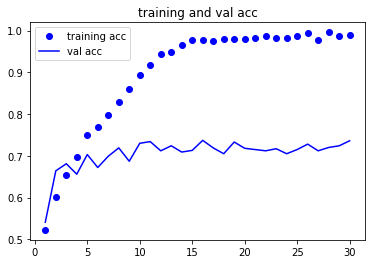

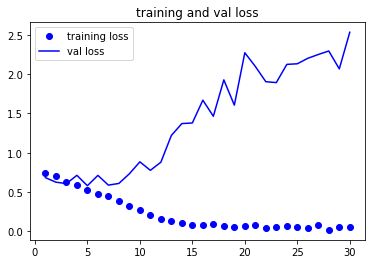

In [23]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

inputs = Input(shape=(4*4*512,))
x = Dense(256,activation="relu")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(1,activation="sigmoid")(x)

model = Model(inputs,outputs)

model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])

hisitory = model.fit(train_features,train_labels,batch_size=20,epochs=30,validation_data=[validation_features,validation_labels])

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc)+1)

plt.figure(1)
plt.plot(epochs,acc,"bo",label="training acc")
plt.plot(epochs,val_acc,"b",label="val acc")
plt.title("training and val acc")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs,loss,"bo",label="training loss")
plt.plot(epochs,val_loss,"b",label="val loss")
plt.title("training and val loss")
plt.legend()
plt.show()


In [24]:
model.evaluate(test_features,test_labels)

1000/1000 [==============================] - 2s 2ms/step


[0.8155611552894115, 0.876]

In [25]:
prediction = model.predict(test_features)

In [26]:
prediction.shape

(1000, 1)

In [27]:
prediction


array([[1.69575214e-05],
       [1.00000000e+00],
       [9.99368548e-01],
       [0.00000000e+00],
       [1.00000000e+00],
       [3.27825546e-07],
       [1.00000000e+00],
       [9.99967813e-01],
       [1.43938988e-01],
       [3.27825546e-07],
       [9.99998569e-01],
       [3.43292952e-04],
       [2.39312649e-05],
       [0.00000000e+00],
       [6.34819269e-04],
       [9.99998748e-01],
       [3.43680382e-04],
       [9.87824738e-01],
       [8.94069672e-08],
       [7.67111778e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99349236e-01],
       [4.54932451e-04],
       [1.00000000e+00],
       [2.33384967e-02],
       [5.36441803e-07],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.68681145e-05],
       [1.25169754e-06],
       [0.00000000e+00],
       [1.99675560e-06],
       [1.00000000e+00],
       [9.99994278e-01],
       [5.59687614e-05],
       [9.23871994e-07],
       [1.00000000e+00],


In [29]:
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.preprocessing import image
model = VGG16(weights="imagenet")

path = "C:/Users/kenta takizawa/Desktop/elephants.jpg"

img = image.load_img(path,target_size=(224,224))
x = image.img_to_array(img) # (224,224,3の配列に変更)
x = np.expand_dims(x,axis=0)#(1,224,224,3)になるように次元を変更
x = preprocess_input(x)

prediction = model.predict(x)
print("Prediction",decode_predictions(prediction,top=3)[0])

40960/35363 [==================================] - 0s 10us/step
Prediction [('n02504458', 'African_elephant', 0.5534391), ('n01871265', 'tusker', 0.26592413), ('n02504013', 'Indian_elephant', 0.17218906)]


In [30]:
np.argmax(prediction[0])#アフリカゾウの番号

386

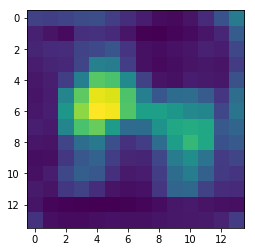

In [32]:
african_elephant_output=model.output[:,386]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(african_elephant_output,last_conv_layer.output)[0]
pooled_grads = K.mean(grads,axis=(0,1,2))
iterate = K.function([model.input],[pooled_grads,last_conv_layer.output[0]])

pooled_grads_value,conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:,:,1]*=pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value,axis=-1)
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)

In [33]:
import cv2


img = cv2.imread(path)
heatmap = cv2.resize(heatmap, (img.shape[1],img.shape[0]))
heatmap = np.uint8(255*heatmap)
heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)#ヒートマップを元画像に適用
superimposed_img = heatmap*0.4+img

cv2.imwrite("C:/Users/kenta takizawa/Desktop/heatmap.jpg",superimposed_img)


True

In [35]:
african_elephant_output

<tf.Tensor 'strided_slice_1:0' shape=(?,) dtype=float32>